In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
'''
accidentes_victimas_comun_auton --> df1
victimas_segun_medio_trans --> df2
victimas_dias_mes --> df3
con_victimas_hora_inter --> df4
infracc_inter --> df5
'''

In [28]:
df1 = pd.read_excel('../data/processed/accidentes_victimas_comun_auton.xlsx')
df1.head()


,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS
0,Andalucía,17367,283,310,1491,22414
1,Aragón,2185,70,75,347,2514
2,"Asturias, Principado de",1842,45,49,198,2256
3,"Balears, Illes",2871,60,64,324,3428
4,Canarias,4270,67,69,384,5466


In [ ]:
# VALORES FALTANTES
for name, error in [ ("df2", df2), ("df3", df3), ("df4", df4), ("df5", df5)]:
    print(name)
    print(error.isna().sum())
    print('-' * 40)


df2
Categoría  Métrica                     
Total      Nº de implicados                0
           VÍCTIMAS                        0
           FALLECIDOS                      0
           HERIDOS\nHOSPITALIZADOS         0
           HERIDOS NO\nHOSPITALIZADOS      0
Conductor  Núm. de implicados              0
           VÍCTIMAS                        0
           FALLECIDOS                      0
           HERIDOS\nHOSPITALIZADOS         0
           HERIDOS NO\nHOSPITALIZADOS      0
Pasajero   Núm. de implicados              0
           VÍCTIMAS                        0
           FALLECIDOS                      0
           HERIDOS\nHOSPITALIZADOS         0
           HERIDOS NO\nHOSPITALIZADOS      0
Peatón     Núm. de implicados              0
           VÍCTIMAS                        0
           FALLECIDOS                      0
           HERIDOS\nHOSPITALIZADOS         0
           HERIDOS NO\nHOSPITALIZADOS      0
Total      Núm. de implicados              1
           

In [71]:
# DUPLICADOS
for name, df in [("df1", df1), ("df2", df2), ("df3", df3), ("df4", df4), ("df5", df5)]:
    print(name, df.duplicated().sum())


df1 7
df2 0
df3 0
df4 0
df5 7


In [58]:
df2 = pd.read_excel('../data/processed/victimas_segun_medio_trans.xlsx')
df2.head()

,CLASES DE USUARIOS,Total,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Conductor,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Peatón,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Total.1,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,Nº de implicados,VÍCTIMAS,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,Núm. de implicados,VÍCTIMAS,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,...,Núm. de implicados,VÍCTIMAS,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,Núm. de implicados,VÍCTIMAS,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS
1,Peatón,893,835,130,173,532,0,0,0,0,...,893,835,130,173,532,13002,12322,213,1449,10660
2,Bicicleta,2667,2525,61,350,2114,2661,2522,60,350,...,0,0,0,0,0,6094,5418,21,394,5003
3,VMP,180,173,2,14,157,177,172,2,14,...,0,0,0,0,0,4708,4188,7,293,3888
4,Ciclomotor,812,768,13,107,648,684,652,12,95,...,0,0,0,0,0,5636,5226,16,333,4877


In [59]:
# 1) Ruta al archivo (ajústala si no coincide con tu WD)
ruta = '../data/processed/victimas_segun_medio_trans.xlsx'

# 2) Lee con dos filas de encabezado y usa la 1ª columna como índice
df2 = pd.read_excel(
    ruta,
    header=[0, 1],    # las dos primeras filas como MultiIndex en columnas
    index_col=0,      # la primera columna (“CLASES DE USUARIOS”) como índice
    engine='openpyxl'
)

# 3) Opcional: ponle nombre a los niveles para mayor claridad
df2.index.name = 'CLASES DE USUARIOS'
df2.columns.names = ['Categoría', 'Métrica']

# 4) Muestra el DataFrame
df2



Categoría                                                     Total           \
Métrica                                            Nº de implicados VÍCTIMAS   
CLASES DE USUARIOS                                                             
Peatón                                                          893      835   
Bicicleta                                                      2667     2525   
VMP                                                             180      173   
Ciclomotor                                                      812      768   
Motocicleta                                                    8766     8313   
Turismo de SP hasta 9 plazas                                    312      129   
Turismo sin remolque                                          65005    36047   
Turismo con remolque                                            148       58   
Furgoneta                                                      5369     2471   
Camión <=3.500 kg sin remolque                                  969      414   
Camión <=3.500 kg con remolque                                    7        3   
Camión >3.500 kg sin remolque                                   930      306   
Camión >3.500 kg con remolque                                    34       13   
Tractocamión (cabeza tractora)                                  865      183   
Vehículo articulado                                            1318      430   
Maquinaria obras y agrícola y tractores\nagrícolas              260       92   
Autobús (no escolar)                                           1027      306   
Autobús escolar                                                  99       15   
Cuadriciclo                                                     153      127   
Tren/metro/tranvía                                               57        4   
Otro vehículo                                                   243      137   
Se desconoce                                                    177       30   
Total                                                         90291    53379   
Total                                                         84344    49963   

Categoría                                                      \
Métrica                                            FALLECIDOS   
CLASES DE USUARIOS                                              
Peatón                                                    130   
Bicicleta                                                  61   
VMP                                                         2   
Ciclomotor                                                 13   
Motocicleta                                               317   
Turismo de SP hasta 9 plazas                                2   
Turismo sin remolque                                      630   
Turismo con remolque                                        0   
Furgoneta                                                  48   
Camión <=3.500 kg sin remolque                              8   
Camión <=3.500 kg con remolque                              0   
Camión >3.500 kg sin remolque                              10   
Camión >3.500 kg con remolque                               0   
Tractocamión (cabeza tractora)                              4   
Vehículo articulado                                        26   
Maquinaria obras y agrícola y tractores\nagrícolas         16   
Autobús (no escolar)                                        1   
Autobús escolar                                             1   
Cuadriciclo                                                 8   
Tren/metro/tranvía                                          0   
Otro vehículo                                              10   
Se desconoce                                                1   
Total                                                    1288   
Total                                                    1273   

Categoría                                                                   \
Métri

In [60]:
df3 = pd.read_excel('../data/processed/victimas_dias_mes.xlsx')
df3.head()

,DÍAS DEL\nMES,Enero,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Febrero,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Total,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,NaN,Accidentes con víctimas,NaN,Víctimas,NaN,NaN,NaN,Accidentes con víctimas,NaN,Víctimas,...,Víctimas,NaN,NaN,NaN,Accidentes con víctimas,NaN,Víctimas,NaN,NaN,NaN
1,NaN,TOTAL,MORTALES A 30 DÍAS,TOTAL,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,TOTAL,MORTALES A 30 DÍAS,TOTAL,...,TOTAL,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,TOTAL,MORTALES A 30 DÍAS,TOTAL,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS
2,Día 1,166,3,224,3,12,209,283,2,374,...,509,8,27,474,3259,74,4450,85,283,4082
3,Día 2,228,4,348,4,20,324,287,3,365,...,359,4,33,322,3319,53,4446,57,298,4091
4,Día 3,271,1,365,1,23,341,339,4,440,...,328,4,27,297,3403,49,4513,55,291,4167


In [61]:
# 1) Ajusta esta ruta si tu WD es otra
ruta = '../data/processed/victimas_dias_mes.xlsx'

# 2) Lee con las filas 2,3 y 4 como MultiIndex de columnas, y la 1ª columna como índice
df3 = pd.read_excel(
    ruta,
    header=[2, 3, 4],   # corresponde a las filas que en el Excel contienen: 
                        #   - Nivel0: Mes (Enero, Febrero…)
                        #   - Nivel1: “Accidentes con víctimas”, “Víctimas”…
                        #   - Nivel2: “TOTAL”, “MORTALES A 30 DÍAS”…
    index_col=0,        # “DÍAS DEL MES” queda como índice
    engine='openpyxl'
)

# 3) Pon nombres claros a los niveles de índice y de columnas
df3.index.name = 'Día del mes'
df3.columns.names = ['Mes', 'Categoría', 'Métrica']

# 4) (Opcional) Aplana el MultiIndex de columnas en nombres únicos compuestos
df3.columns = [
    f"{str(mes).strip()} {str(cat).strip()} {str(met).strip()}".replace('\n', ' ')
    for mes, cat, met in df3.columns
]

# 5) Muestra el DataFrame — en un .ipynb basta con esta última línea
df3


,TOTAL 166 228,MORTALES A 30 DÍAS 3 4,TOTAL 224 348,FALLECIDOS 3 4,HERIDOS HOSPITALIZADOS 12 20,HERIDOS NO HOSPITALIZADOS 209 324,TOTAL 283 287,MORTALES A 30 DÍAS 2 3,TOTAL 374 365,FALLECIDOS 2 4,...,TOTAL 509 359,FALLECIDOS 8 4,HERIDOS HOSPITALIZADOS 27 33,HERIDOS NO HOSPITALIZADOS 474 322,TOTAL 3259 3319,MORTALES A 30 DÍAS 74 53,TOTAL 4450 4446,FALLECIDOS 85 57,HERIDOS HOSPITALIZADOS 283 298,HERIDOS NO HOSPITALIZADOS 4082 4091
Día del mes,,,,,,,,,,,,,,,,,,,,,
Día 3,271,1,365,1,23,341,339,4,440,5,...,328,4,27,297,3403,49,4513,55,291,4167
Día 4,272,0,355,0,18,337,272,10,386,10,...,401,2,26,373,3402,66,4533,69,351,4113
Día 5,295,2,394,2,34,358,233,4,339,5,...,405,4,22,379,3321,54,4495,60,330,4105
Día 6,193,5,260,6,15,239,308,5,400,5,...,301,7,20,274,3189,59,4242,60,304,3878
Día 7,224,6,304,6,20,278,278,4,381,4,...,339,4,36,299,3251,55,4381,56,305,4020
Día 8,207,2,292,2,9,281,244,3,310,3,...,266,5,14,247,3154,43,4227,46,282,3899
Día 9,303,7,395,7,19,369,247,4,315,4,...,255,5,24,226,3231,59,4383,62,298,4023
Día 10,298,3,379,3,21,355,284,6,399,7,...,296,6,24,266,3425,62,4677,68,311,4298
Día 11,274,10,329,10,22,297,239,6,344,6,...,356,2,29,325,3482,59,4756,66,322,4368


In [ ]:
df4 = pd.read_excel('../data/processed/con_victimas_hora_inter.xlsx')

In [62]:
# 1) Ajusta la ruta si tu directorio de trabajo es distinto
ruta = '../data/processed/con_victimas_hora_inter.xlsx'

# 2) Lee el Excel tomando las filas 2 y 3 como MultiIndex de columnas y la 1ª columna como índice
df4 = pd.read_excel(
    ruta,
    header=[2, 3],    # fila 2 → nivel0 (“HORA” / “ACCIDENTES CON VÍCTIMAS”), fila 3 → nivel1 (“Lunes”, “Martes”… “Total”)
    index_col=0,      # toma la columna “HORA” como índice
    engine='openpyxl'
)

# 3) Pon nombres claros a los niveles de índice y columnas
df4.index.name = 'Hora'
df4.columns.names = ['Categoría', 'Día']

# 4) (Opcional) Aplana el MultiIndex en un nombre único para facilitar filtros o gráficos
df4.columns = [
    f"{cat.strip()} {día.strip()}"
    for cat, día in df4.columns
]

# 5) Muestra el DataFrame (en un .ipynb basta con poner `df` como última línea)
df4


,ACCIDENTES CON VÍCTIMAS Lunes,ACCIDENTES CON VÍCTIMAS Martes,ACCIDENTES CON VÍCTIMAS Miércoles,ACCIDENTES CON VÍCTIMAS Jueves,ACCIDENTES CON VÍCTIMAS Viernes,ACCIDENTES CON VÍCTIMAS Sábado,ACCIDENTES CON VÍCTIMAS Domingo,Total Unnamed: 8_level_1
Hora,,,,,,,,
00:00-00:59,86,59,56,59,68,105,111,544
01:00-01:59,50,37,47,40,53,85,102,414
02:00-02:59,36,30,24,31,30,73,92,316
03:00-03:59,36,29,27,21,32,77,79,301
04:00-04:59,29,31,34,30,40,79,85,328
05:00-05:59,65,49,80,75,73,98,106,546
06:00-06:59,166,137,137,149,138,162,156,1045
07:00-07:59,339,297,298,253,247,132,166,1732
08:00-08:59,343,321,338,314,271,148,167,1902


In [ ]:
df5 = pd.read_excel('../data/processed/infracc_inter.xlsx')

In [63]:

# 1) Ajusta la ruta si tu directorio de trabajo es distinto
ruta = '../data/processed/infracc_inter.xlsx'

# 2) Lee el Excel tomando la fila 2 (cero-indexada) como cabecera y la 1ª columna como índice
df5 = pd.read_excel(
    ruta,
    header=2,      # la tercera fila contiene los nombres de las columnas
    index_col=0,   # la primera columna (“TIPO DE INFRACCIÓN”) como índice
    engine='openpyxl'
)

# 3) Pon nombres claros a índice y a las columnas (opcional)
df5.index.name   = 'Tipo de infracción'
df5.columns.name = 'Vehículo'

# 4) Finalmente, muestra el DataFrame
df5.head()


Vehículo,Total,Bicicleta,VMP,Ciclomotor,Motocicleta,Turismo,Furgoneta,Camión =< 3.500 kg,Camión > 3.500 kg,Autobús,Otro vehículo,Se desconoce
Tipo de infracción,,,,,,,,,,,,
Infracción de velocidad,4541,113,8,36,996,2981,187,44,137,5,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,0,2,3,27,2,2,5,0,1,0
Ninguna infracción de velocidad,28098,1478,105,350,2565,19682,1628,331,1498,154,278,29
Se desconoce,28367,1070,64,296,4261,18768,1889,376,1285,88,215,55
Total infracciones de velocidad,61048,2661,177,684,7825,41458,3706,753,2925,247,520,92


Accidentes con víctimas: 473286
Accidentes mortales: 3360
Heridos hospitalizados: 18530
Heridos no hospitalizados: 248532


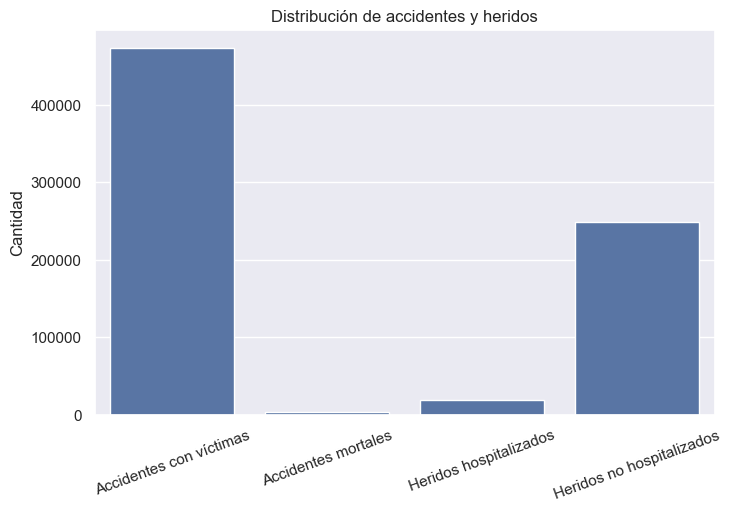

In [77]:
# RESPONDER A LA VISION GLOBAL
#Objetivo: ¿Cómo se distribuyen los accidentes (entre "accidentes con víctimas" y "accidentes mortales") y los heridos (segun "heridos hospitalizados" y "heridos no hospitalizados")?
# Seleccionamos las columnas relevantes del total mensual (fila 'Total')
cols_accidentes = [col for col in df3.columns if "TOTAL" in col]
cols_mortales = [col for col in df3.columns if "MORTALES A 30 DÍAS" in col]
cols_heridos_hosp = [col for col in df3.columns if "HERIDOS HOSPITALIZADOS" in col]
cols_heridos_nohosp = [col for col in df3.columns if "HERIDOS NO HOSPITALIZADOS" in col]

# Extraemos los totales de la fila 'Total'
totales = df3.loc["Total"]

# Sumamos los valores de cada grupo
accidentes_victimas = totales[cols_accidentes].sum()
accidentes_mortales = totales[cols_mortales].sum()
heridos_hospitalizados = totales[cols_heridos_hosp].sum()
heridos_no_hospitalizados = totales[cols_heridos_nohosp].sum()

# Mostramos la distribución
print("Accidentes con víctimas:", accidentes_victimas)
print("Accidentes mortales:", accidentes_mortales)
print("Heridos hospitalizados:", heridos_hospitalizados)
print("Heridos no hospitalizados:", heridos_no_hospitalizados)

# Visualización
labels = ['Accidentes con víctimas', 'Accidentes mortales', 'Heridos hospitalizados', 'Heridos no hospitalizados']
values = [accidentes_victimas, accidentes_mortales, heridos_hospitalizados, heridos_no_hospitalizados]

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=values)
plt.title("Distribución de accidentes y heridos")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.show()
